<a href="https://colab.research.google.com/github/Pathak1511/Deep-Learning/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import layers
import numpy as np

In [ ]:
(X_train,_),(X_test,_) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
X_train = X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))

In [ ]:
X_train = X_train/255
X_test = X_test/255
print(X_train.shape)

(60000, 784)


In [ ]:
model = Sequential()
# Add the hidden layer with the specified input
model.add(Dense(32, activation='relu', input_shape=(784,)))

# Add the output layer
model.add(Dense(784, activation='sigmoid'))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,X_train,epochs=20,validation_data=(X_test,X_test))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0319 - val_loss: 0.0162
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0135 - val_loss: 0.0113
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0112 - val_loss: 0.0105
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0107 - val_loss: 0.0102
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0103 - val_loss: 0.0100
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.010

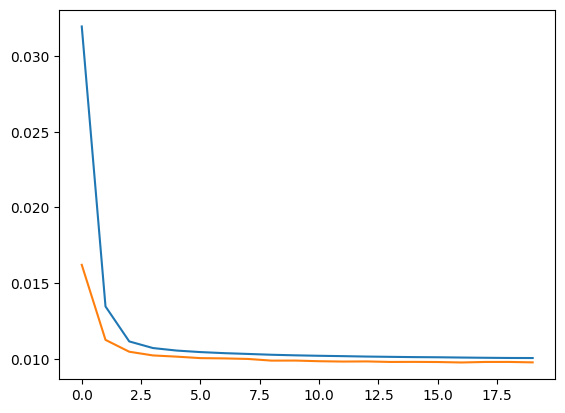

In [ ]:
import matplotlib.pyplot as plt
# plotting loss vs val_loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

(10000, 28, 28)


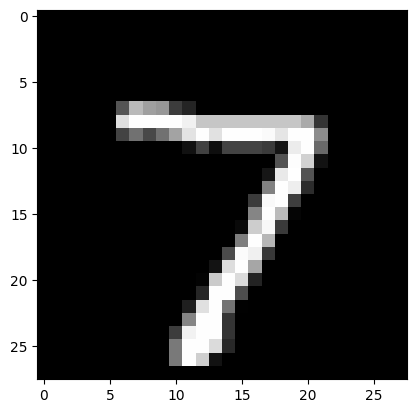

In [ ]:
orgImg = X_test.reshape((10000, 28, 28))
print(orgImg.shape)
plt.imshow(orgImg[0]*255)
plt.gray()

In [ ]:
encoded_imgs = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


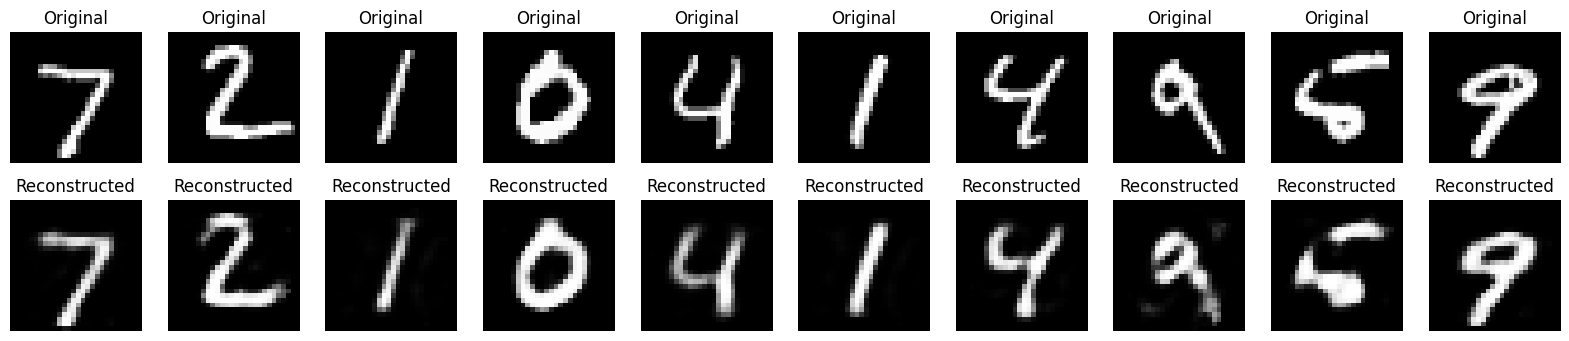

In [ ]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
  # Original
  ax = plt.subplot(2,n,i+1)
  plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
  plt.gray()
  plt.title("Original")
  plt.axis('off')

  # reconstruction
  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(encoded_imgs[i].reshape(28,28))
  plt.gray()
  plt.title("Reconstructed")
  plt.axis('off')
plt.show()